# Importing the libraries

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [134]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [135]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [136]:
data.shape

(7043, 21)

# Checking for Missing Values

In [137]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [138]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [139]:
#Dropping customer_id column
data.drop(columns=['customerID'],inplace=True)

In [140]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [141]:
data['Churn']=data['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [142]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

# Plot showing target distribution

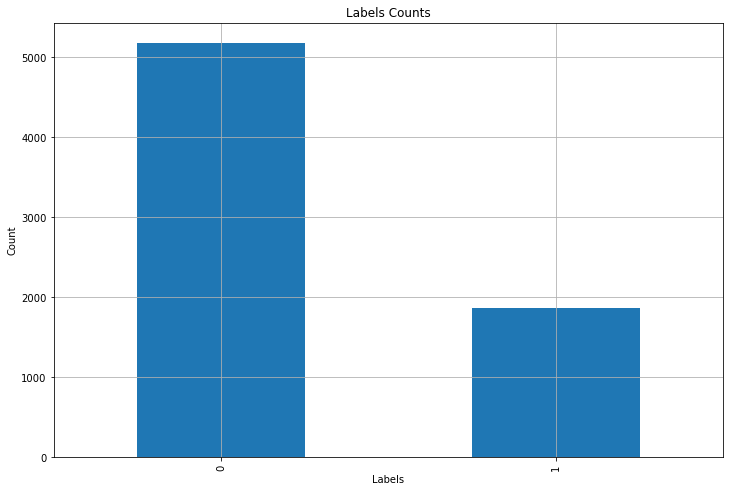

In [143]:
data['Churn'].value_counts().plot(kind='bar',grid=True,figsize=(12,8))
plt.title('Labels Counts')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [144]:
men=data[data['gender']=='Male']

In [145]:
men_churn_percentage=round((men['Churn'].sum()/men.shape[0])*100,2)
men_churn_percentage

26.16

In [146]:
female=data[data['gender']=='Female']

In [147]:
female_churn_percentage=round((female['Churn'].sum()/female['Churn'].shape[0]),2)
female_churn_percentage

0.27

In [148]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [149]:
data['target']=data['Churn'].apply(lambda x:'yes' if x==1 else 'no')

In [150]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  target  
0           Electronic check          29.85         29.85     0      no  
1               Mailed check          56.95        1889.5     0      no  
2               Mailed check          53.85        108.15     1     yes  
3  Bank transfer (automatic)          42.30       1840.75     0      no  
4           Electronic check          70.70        151.65     1     yes  

[5 rows x 21 columns]

# Plot showing target distribution across gender

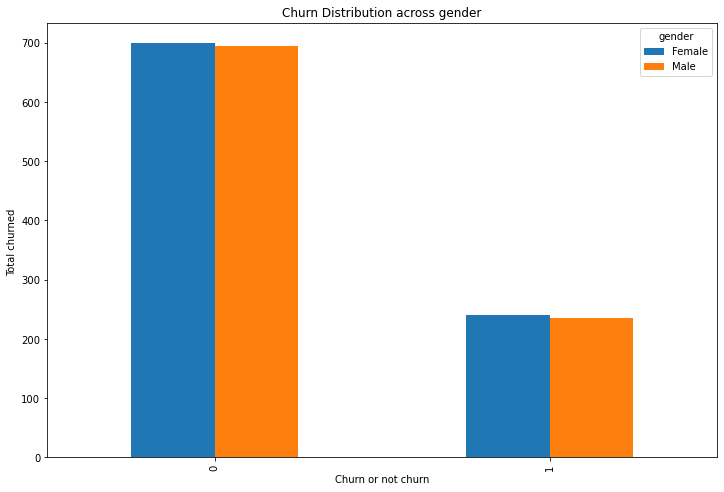

In [151]:
data.groupby(['gender','SeniorCitizen'])['Churn'].sum().unstack('gender').plot(kind='bar',figsize=(12,8))
plt.xlabel('Churn or not churn')
plt.ylabel('Total churned ')
plt.title('Churn Distribution across gender')
plt.show()

In [152]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  target  
0           Electronic check          29.85         29.85     0      no  
1               Mailed check          56.95        1889.5     0      no  
2               Mailed check          53.85        108.15     1     yes  
3  Bank transfer (automatic)          42.30       1840.75     0      no  
4           Electronic check          70.70        151.65     1     yes  

[5 rows x 21 columns]

In [153]:
d1=data.groupby(['gender','Contract'])['Churn'].sum().reset_index()

In [154]:
d1

gender        Contract  Churn
0  Female  Month-to-month    842
1  Female        One year     75
2  Female        Two year     22
3    Male  Month-to-month    813
4    Male        One year     91
5    Male        Two year     26

# Plot showing target distribution across different contract

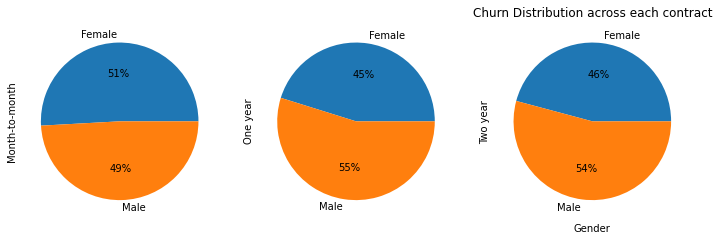

In [155]:
pd.pivot_table(d1,index='gender',columns='Contract',values='Churn').plot(kind='pie',subplots=True,legend=False,figsize=(12,8),autopct='%1.0f%%')
plt.xlabel('Gender')
plt.title('Churn Distribution across each contract')
plt.show()

In [156]:
data.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  target  
0           Electronic check          29.85         29.85     0      no  
1               Mailed check          56.95        1889.5     0      no  
2               Mailed check          53.85        108.15     1     yes  
3  Bank transfer (automatic)          42.30       1840.75     0      no  
4           Electronic check          70.70        151.65     1     yes  

[5 rows x 21 columns]

In [157]:
data.drop(columns=['target'],inplace=True)

# MeanEncoding the categorical Variables

In [158]:
def MeanEncoding(data,col,target):
    mapp=data.groupby(col)[target].mean().to_dict()
    data[col]=data[col].map(mapp)
    return data

In [159]:
a=data.drop(columns=['Churn'])

In [160]:
cat_feat=[i for i in x.columns if a[i].dtype=='O']
cont_feat=[i for i in x.columns if a[i].dtype!='O']

In [161]:
for i in cat_feat:
    data=MeanEncoding(data,i,'Churn')

In [162]:
data.head()

gender  SeniorCitizen   Partner  Dependents  tenure  PhoneService  \
0  0.269209              0  0.196649    0.312791       1      0.249267   
1  0.261603              0  0.329580    0.312791      34      0.267096   
2  0.261603              0  0.329580    0.312791       2      0.267096   
3  0.261603              0  0.329580    0.312791      45      0.249267   
4  0.269209              0  0.329580    0.312791       2      0.267096   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0.249267         0.189591        0.417667      0.215315   
1       0.250442         0.189591        0.146112      0.399288   
2       0.250442         0.189591        0.146112      0.215315   
3       0.249267         0.189591        0.146112      0.399288   
4       0.250442         0.418928        0.417667      0.399288   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0          0.391276     0.416355     0.335231         0.336804  0.427097   
1          0.225021     0.416355     0.335231         0.336804  0.112695   
2          0.391276     0.416355     0.335231         0.336804  0.427097   
3          0.225021     0.151663     0.335231         0.336804  0.112695   
4          0.391276     0.416355     0.335231         0.336804  0.427097   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0          0.335651       0.452854           29.85           0.0      0  
1          0.163301       0.191067           56.95           0.0      0  
2          0.335651       0.191067           53.85           1.0      1  
3          0.163301       0.167098           42.30           0.0      0  
4          0.335651       0.452854           70.70           1.0      1

In [163]:
x=data.drop(columns=['Churn'])
y=data['Churn']

# Spliting the data

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [165]:
scaler=StandardScaler()
x_train[cont_feat]=scaler.fit_transform(x_train[cont_feat])
x_test[cont_feat]=scaler.transform(x_test[cont_feat])

<ipython-input-165-747bc76d3433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[cont_feat]=scaler.fit_transform(x_train[cont_feat])
C:\Users\Reshmi\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-165-747bc76d3433>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [166]:
x_train

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
877   0.269209      -0.438147  0.329580    0.154502  0.754422      0.249267   
5792  0.269209       2.282338  0.329580    0.312791 -0.710751      0.267096   
5334  0.269209      -0.438147  0.196649    0.154502  0.673024      0.267096   
878   0.269209      -0.438147  0.329580    0.312791  1.120716      0.267096   
6578  0.269209      -0.438147  0.329580    0.154502 -0.914247      0.267096   
...        ...            ...       ...         ...       ...           ...   
79    0.269209      -0.438147  0.196649    0.154502  0.510227      0.267096   
3927  0.261603      -0.438147  0.196649    0.312791 -1.199142      0.267096   
5955  0.261603      -0.438147  0.196649    0.154502  1.609107      0.267096   
6936  0.261603      -0.438147  0.196649    0.154502 -1.117744      0.267096   
5640  0.261603      -0.438147  0.329580    0.312791 -1.280541      0.267096   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
877        0.249267         0.189591        0.146112      0.399288   
5792       0.250442         0.418928        0.146112      0.399288   
5334       0.286099         0.418928        0.417667      0.215315   
878        0.286099         0.189591        0.146112      0.399288   
6578       0.286099         0.189591        0.146112      0.399288   
...             ...              ...             ...           ...   
79         0.286099         0.074050        0.074050      0.074050   
3927       0.250442         0.074050        0.074050      0.074050   
5955       0.250442         0.189591        0.146112      0.215315   
6936       0.286099         0.418928        0.417667      0.215315   
5640       0.250442         0.418928        0.417667      0.399288   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
877           0.225021     0.151663     0.300702         0.299414  0.112695   
5792          0.225021     0.151663     0.335231         0.299414  0.427097   
5334          0.225021     0.151663     0.300702         0.299414  0.028319   
878           0.225021     0.151663     0.335231         0.336804  0.112695   
6578          0.225021     0.151663     0.335231         0.299414  0.112695   
...                ...          ...          ...              ...       ...   
79            0.074050     0.074050     0.074050         0.074050  0.112695   
3927          0.074050     0.074050     0.074050         0.074050  0.427097   
5955          0.391276     0.151663     0.300702         0.336804  0.028319   
6936          0.391276     0.416355     0.335231         0.336804  0.427097   
5640          0.391276     0.416355     0.335231         0.299414  0.427097   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
877           0.163301       0.167098       -0.145568           0.0  
5792          0.335651       0.191067        1.051796           1.0  
5334          0.335651       0.167098        1.437668           1.0  
878           0.163301       0.452854        0.006794           0.0  
6578          0.163301       0.152431        0.298268           0.0  
...                ...            ...             ...           ...  
79            0.335651       0.152431       -1.279999           0.0  
3927          0.335651       0.152431       -1.457203           1.0  
5955          0.163301       0.167098        0.127689           0.0  
6936          0.335651       0.452854        0.516874           1.0  
5640          0.163301       0.452854        0.498657           1.0  

[4930 rows x 19 columns]

In [167]:
from sklearn.metrics import accuracy_score,classification_report

In [168]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_pred,y_test)
    report=classification_report(y_test,y_pred)
    return score,report
    

# Building Various Models 

In [169]:
logis_accuracy,logis_report=Prediction(LogisticRegression(),x_train,x_test,y_train,y_test)
logis_accuracy


0.9810695693327023

In [170]:
print(logis_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.96      0.97      0.96       566

    accuracy                           0.98      2113
   macro avg       0.97      0.98      0.98      2113
weighted avg       0.98      0.98      0.98      2113



In [171]:
rf_score,rf_report=Prediction(RandomForestClassifier(n_estimators=300,max_depth=3,random_state=100),x_train,x_test,y_train,y_test)
rf_score

0.975390440132513

In [172]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1547
           1       0.96      0.94      0.95       566

    accuracy                           0.98      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113



In [173]:
grad_score,grad_report=Prediction(GradientBoostingClassifier(n_estimators=300,max_depth=3,random_state=100),x_train,x_test,y_train,y_test)
grad_score

0.9763369616658779

In [174]:
print(grad_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1547
           1       0.96      0.96      0.96       566

    accuracy                           0.98      2113
   macro avg       0.97      0.97      0.97      2113
weighted avg       0.98      0.98      0.98      2113



In [175]:
result=pd.DataFrame({'Models':['LogisticRegression','RandomForest','GradientBoosting'],'Accuracy':[logis_accuracy,rf_score,grad_score]})

# Plot showing feature importance

In [176]:
def Feature_importance(model,x_train,y_train,graph=False):
    if graph==True:
        model.fit(x_train,y_train)
        feat=pd.Series(model.feature_importances_,index=x_train.columns)
        feat.plot(kind='bar',grid=True,figsize=(12,8))
    else:
        model.fit(x_train,y_train)
        feat=pd.Series(model.feature_importances_,index=x_train.columns)
        return feat

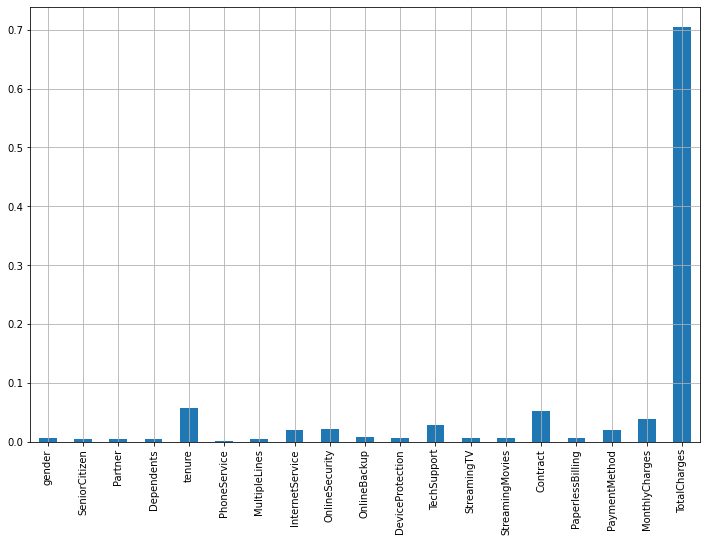

In [177]:
feat=Feature_importance(RandomForestClassifier(),x_train,y_train,graph=True)

# Using Recurrent feature selection and xgboost model

In [178]:
from sklearn.feature_selection import RFE

In [179]:
sel=RFE(xgb.XGBClassifier(n_estimators=300,learning_rate=0.01,max_depth=3))
sel.fit(x_train,y_train)

C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:56:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Reshmi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RFE(estimator=XGBClassifier(base_score=None, booster=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, gamma=None, gpu_id=None,
                            importance_type='gain',
                            interaction_constraints=None, learning_rate=0.01,
                            max_delta_step=None, max_depth=3,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=300,
                            n_jobs=None, num_parallel_tree=None,
                            random_state=None, reg_alpha=None, reg_lambda=None,
                            scale_pos_weight=None, subsample=None,
                            tree_method=None, validate_parameters=None,
                            verbosity=None))

In [180]:
selected_Feat=x_train.columns[sel.get_support()]
selected_Feat

Index(['SeniorCitizen', 'InternetService', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [181]:
x_train_feat=x_train.columns[sel.get_support()]
x_test_feat=x_test.columns[sel.get_support()]

In [182]:
model=xgb.XGBClassifier(n_estimators=300,max_depth=3)

In [183]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

[21:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [184]:
xgb_score=accuracy_score(y_pred,y_test)
xgb_score

0.9768102224325603

# HyperParameter uning Logisticregression using GridSearch

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
param={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [187]:
grid=GridSearchCV(LogisticRegression(max_iter=300,random_state=100,penalty='l2'),param_grid=param,cv=5)

In [188]:
grid.fit(x_train,y_train)

C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300, random_state=100),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [189]:
grid.best_params_

{'C': 100}

In [190]:
grid.best_score_

0.982555780933063

In [191]:
model=LogisticRegression(C=100,max_iter=300,random_state=100,penalty='l2')
model.fit(x_train,y_train)

LogisticRegression(C=100, max_iter=300, random_state=100)

In [192]:
y_pred=model.predict(x_test)
new_lg_score=accuracy_score(y_pred,y_test)

In [193]:
result=pd.DataFrame({'Models':['LogisticRegression','RandomForest','GradientBoosting','XGBoost','Logisticregression_after_Tuning'],'Accuracy':[logis_accuracy,rf_score,grad_score,xgb_score,new_lg_score]})

# Final Result

In [194]:
result

Models  Accuracy
0               LogisticRegression  0.981070
1                     RandomForest  0.975390
2                 GradientBoosting  0.976337
3                          XGBoost  0.976810
4  Logisticregression_after_Tuning  0.983436

# Conclusion